In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dataset contains songs from 1922 to 2021
df_songs=pd.read_csv(r"C:\NATHI\tracks.csv")
df_songs.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
#check for the null values
pd.isnull(df_songs)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586668,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586669,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#count the number of null values for each column
pd.isnull(df_songs).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [5]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
#listing the top 10 least popular songs
leastpop=df_songs.sort_values("popularity",ascending=True).head(10)
leastpop

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4
546218,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,183427,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4
546217,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,1767071,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",1949-04-10,0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4
546216,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,162147,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4
546215,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",1949-05-19,0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4
546214,0Wwm0ruSjYMIiWG0nyAI1F,"Screen Director's Playhouse, It's A Wonderful ...",0,1767576,0,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...","['6GK59BC4LJzqR0OpHAX2S3', '58BzBaExrnrx898sby...",1949-05-08,0.645,0.341,8,-12.177,1,0.8670,0.690,0.000000,0.1530,0.431,117.591,4


In [7]:
#lising the most popular top 10 songs
mostpopular=df_songs.sort_values("popularity",ascending=False).head(10)
mostpopular

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


In [8]:
#analyse the descriptive statistics
df_songs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [9]:
#change the release date column as index
df_songs.set_index("release_date",inplace=True)
df_songs.index=pd.to_datetime(df_songs.index)
df_songs.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [10]:
#to extract a particular row value(4th row) from a specific column(name)
df_songs["name"].iloc[4]

'Lady of the Evening'

In [11]:
#convert the duration_ms column from ms to sec
df_songs['duration']=df_songs['duration_ms'].apply(lambda x: round(x/1000))   #div by 1000 to convert ms to sec 
df_songs.drop('duration_ms',inplace=True,axis=1)       #remove the duration in ms col
df_songs.duration.head(5)

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

In [12]:
#remove the unwanted columns like key,mode and explicit
df_songs.drop(['key','mode','explicit'],axis=1)

,id,name,popularity,artists,id_artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,127
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,98
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,182
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,177
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,5rgu12WBIHQtvej2MdHSH0,云与海,50,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,258
2020-10-21,0NuWgxEp51CutD2pJoF4OM,blind,72,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,153
2020-09-02,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,188


In [13]:
#The Pearson correlation measures the strength of the linear relationship between two variables.
#It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.
correlation=df_songs.corr(method='pearson')
correlation

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
popularity,1.000000,0.211758,0.187000,0.302315,0.015299,0.327028,-0.033655,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759,0.027683
explicit,0.211758,1.000000,0.150229,0.123076,0.010932,0.134603,-0.051754,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745,0.044447,-0.016742
danceability,0.187000,0.150229,1.000000,0.241563,0.018824,0.251436,-0.044719,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196,-0.120368
energy,0.302315,0.123076,0.241563,1.000000,0.036294,0.764735,-0.065246,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983,0.024828
key,0.015299,0.010932,0.018824,0.036294,1.000000,0.027109,-0.129491,-0.001035,-0.027414,-0.006776,-0.006774,0.019992,0.004904,0.008928,0.004621
loudness,0.327028,0.134603,0.251436,0.764735,0.027109,1.000000,-0.040464,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377,0.000345
mode,-0.033655,-0.051754,-0.044719,-0.065246,-0.129491,-0.040464,1.000000,-0.017992,0.058918,-0.010008,0.007009,0.011474,0.007871,-0.015892,-0.027616
speechiness,-0.047357,0.102258,0.199310,-0.053506,-0.001035,-0.167112,-0.017992,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171,-0.125770
acousticness,-0.370882,-0.149018,-0.242951,-0.715412,-0.027414,-0.519423,0.058918,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927,-0.064435
instrumentalness,-0.236487,-0.067520,-0.225900,-0.195839,-0.006776,-0.329306,-0.010008,-0.102440,0.204412,1.000000,-0.038848,-0.175226,-0.055477,-0.042257,0.069271


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo'),
 Text(13.5, 0, 'time_signature'),
 Text(14.5, 0, 'duration')]

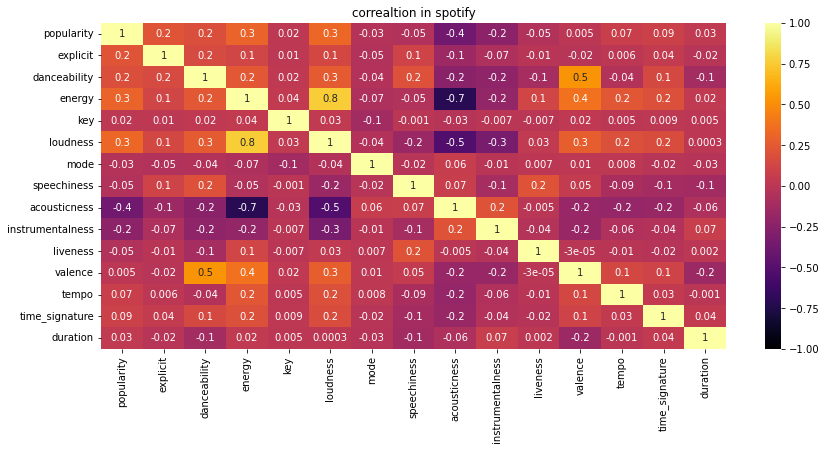

In [14]:
#visualize the values using heatmap
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(correlation,vmin=-1, vmax=1, cmap='inferno', center=0,annot=True, fmt='.1g',linewidths=0, linecolor='white')
#annot =true will write the value in each cell
#fmt - size(no. of digits to be displayed after decimal point) of the string written in annot 
heatmap.set_title('correaltion in spotify')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [15]:
#there is high positive correl bet loudness and energy
#there is a strong neg correl betenergy and acousticness

In [16]:
#as the dataset is large ,create a sample df to work on it
sample_df=df_songs.sample(int(0.004*len(df_songs)))

In [17]:
sample_df

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1978-01-01,0m9NVxA613Dn3D6DgeubpM,Allo réseau,5,0,['Kim Harlow'],['7jdrJS7v28EJV46ofaoIJ4'],0.660,0.9360,11,-7.880,0,0.0786,0.084100,0.001420,0.2390,0.792,125.712,4,246
1996-03-26,2gdtLnVGGg80Kj9GiqP0vH,Trippin' on a Hole in a Paper Heart,58,0,['Stone Temple Pilots'],['2UazAtjfzqBF0Nho2awK4z'],0.470,0.9890,7,-3.857,1,0.0632,0.000386,0.001610,0.1570,0.446,106.479,4,176
1996-01-01,5Pgwi0iizu96RHxJ4xL3SH,Strawberry Wine,61,0,['Deana Carter'],['0aqrM7Fo3Ml66Kc5JAzmjt'],0.572,0.4490,1,-6.566,1,0.0264,0.314000,0.000000,0.0301,0.207,122.632,3,292
2002-01-01,5zD6UMADGXROorbyi6lWhH,Mi-Ai Luat Inima,17,0,['Proconsul'],['78KYBXuhbIq6YWiiSGUvTb'],0.638,0.8290,2,-5.970,1,0.0350,0.075000,0.000000,0.0815,0.625,119.947,4,253
1974-01-01,6ko3JSgsEYJsxa27H2HmZB,שניים - פסטיבל הזמר 1974,12,0,['The Pure Souls'],['6Np0YXMg3YOVqgdITFyJqs'],0.493,0.5030,9,-9.237,0,0.0274,0.652000,0.000000,0.2570,0.589,141.682,4,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-01-01,3ivCKJqe7y23kebjJnb2Ua,Dangereux,44,0,['Iam'],['56Q6weEROZ1RsVrTak8Bm7'],0.769,0.6980,11,-5.518,0,0.2810,0.006590,0.012800,0.4460,0.667,89.624,4,225
1962-03-01,0OZWFT5f1V4m6TUNj9GrMz,Somewhere Along The Way - Remastered,15,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],0.271,0.1960,2,-14.326,1,0.0330,0.877000,0.003660,0.1620,0.136,130.472,4,182
1990-01-01,0q9oFnXVo327tgVh4VzJLj,Infierno,24,0,['Proyección'],['119DPASXtwEkIiAoRSOUR8'],0.557,0.5450,0,-9.713,1,0.1140,0.618000,0.000000,0.1690,0.626,72.663,4,239


In [18]:
len(sample_df)

2346

[Text(0.5, 1.0, 'Energy vs Loudeness')]

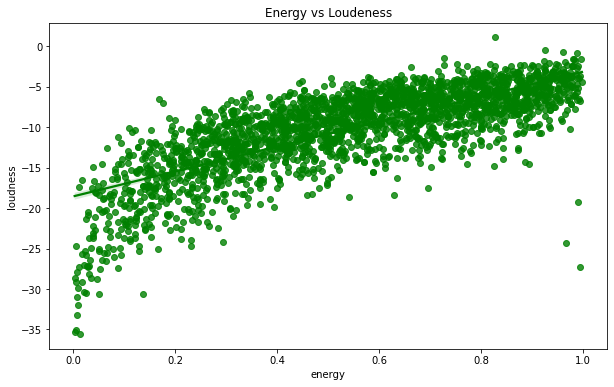

In [19]:
#as there is a correl bet energy and laoudness ,we will visualize it in regression plot
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,x='energy',y='loudness',color='g').set(title ='Energy vs Loudeness')
#graph shows as energy of the song inc ,the loudness also inc.hence the reg line is upwards.

[Text(0.5, 1.0, 'popularity vs acousticness')]

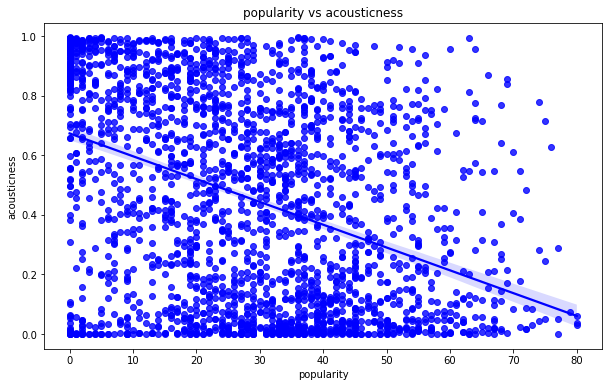

In [20]:
#let's map between popularity and acousticness
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,x='popularity',y='acousticness',color='b').set(title='popularity vs acousticness')
#the reg line is downward,as popularity inc,the acousticness dec and viseversa

In [21]:
#create a new col called year which is extracted from the release date col
#first change release date col to date format
df_songs['date']=df_songs.index.get_level_values('release_date')
df_songs.date=pd.to_datetime(df_songs.date)
years=df_songs.date.dt.year

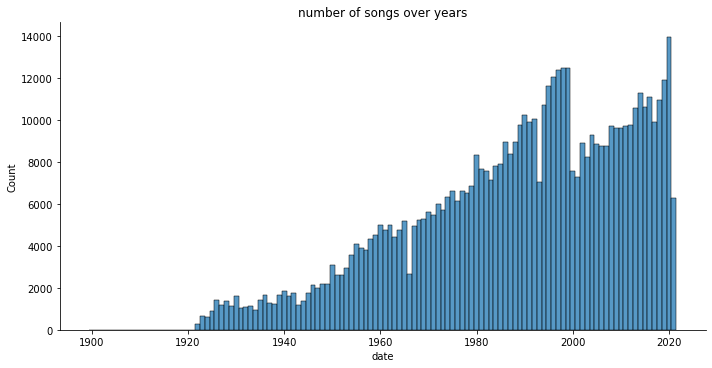

In [22]:
#plot the distribution of songs from 1922 to 2021
sns.displot(years,kind='hist',height=5,discrete=True,aspect=2).set(title='number of songs over years')
#in the initial years,the no. of songs were less and nowadays it has increased alot